Access to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive') 

Mounted at /content/gdrive


Function to list files

In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

Check the folder structure

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    C.longa/
        kunyit_146.jpg
        kunyit_95.jpg
        kunyit_391.jpg
        kunyit_81.jpg
        kunyit_185.jpg
        kunyit_192.jpg
        kunyit_350.jpg
        kunyit_346.jpg
        kunyit_390.jpg
        kunyit_378.jpg
        kunyit_150.jpg
        kunyit_178.jpg
        kunyit_42.jpg
        kunyit_56.jpg
        kunyit_186.jpg
        kunyit_353.jpg
        kunyit_347.jpg
        kunyit_387.jpg
        kunyit_43.jpg
        kunyit_344.jpg
        kunyit_193.jpg
        kunyit_232.jpg
        kunyit_385.jpg
        kunyit_227.jpg
        kunyit_191.jpg
        kunyit_233.jpg
        kunyit_179.jpg
        kunyit_226.jpg
        kunyit_352.jpg
        kunyit_187.jpg
        kunyit_57.jpg
        kunyit_151.jpg
        kunyit_80.jpg
        kunyit_152.jpg
        kunyit_145.jpg
        kunyit_94.jpg
        kunyit_384.jpg
        kunyit_144.jpg
        kunyit_235.jpg
        kunyit_351.jpg
        kunyit_231.jpg
        kunyit_143.jpg
        kunyit_147.j

read dataset


Dataset
C.longa


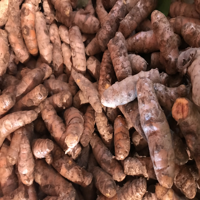

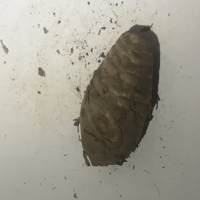

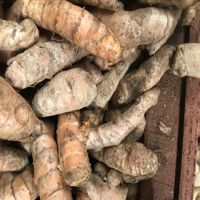

C.zanthorrhiza


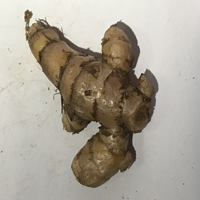

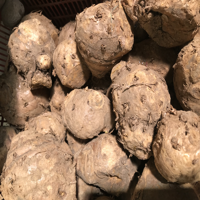

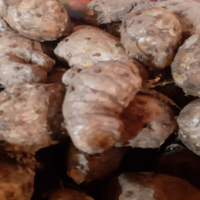

In [ ]:
from PIL import Image
import os
from IPython.display import display 
from imutils import paths

imgpths = paths.list_images('Dataset')
print('Dataset')
count=0
kelas_seb = None
for dirimg in imgpths:
  kelas = dirimg.split(os.path.sep) [1]
  if kelas_seb is None:
    print(kelas)
    kelas_seb = kelas
  if kelas_seb != kelas:
    print(kelas)
    count=0
    kelas_seb = kelas
  a = Image.open(dirimg)
 
  count=count+1
  if count <= 3:
    im =a.resize((200,200))
    display(im)
  else:
    continue


In [ ]:
imgpths = paths.list_images('Dataset')
count=1
kelas_seb = None
for dirimg in imgpths:
  dir = dirimg.split(os.path.sep)[0]
  kelas = dirimg.split(os.path.sep)[1]
  nama = dirimg.split(os.path.sep)[2]
  if kelas_seb is None:
    kelas_seb = kelas
  if kelas_seb != kelas:
    count=1
    kelas_seb = kelas
  pat = os.path.join(dir,kelas,nama)
  nama_baru = kelas+str(count)+'.jpg'
  os.rename(pat,os.path.join(dir,kelas,nama_baru))
  count=count+1


Function to make unique

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Sebuah function untuk mendapatkan nilai-nilai unik dari sebuah list, menjadi list baru yang berisi nilai-nilai yang tidak berulang.

In [ ]:
import numpy as np

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['C.longa', 'C.zanthorrhiza']

In [ ]:
def image_to_feature_vector(image, size=(224, 224)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

confusion matrix , credit to the creator stated in the URL

In [ ]:
#import numpy as np

def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("[INFO] Inisialisasi Model")



[INFO] Inisialisasi Model




Experiment for k= 1  on all folds

List of Acc. on all folds: [81.5385 76.9231 86.1538 80.     72.3077 81.5385 73.8462 79.6875 76.5625
 87.5   ]

Max Acc: 87.5 %
Min Acc: 72.31 %
Average : 79.61 %
Standard Deviation: 4.9
Confusion Matrix and its plot:
 [[336.  60.]
 [ 72. 179.]]


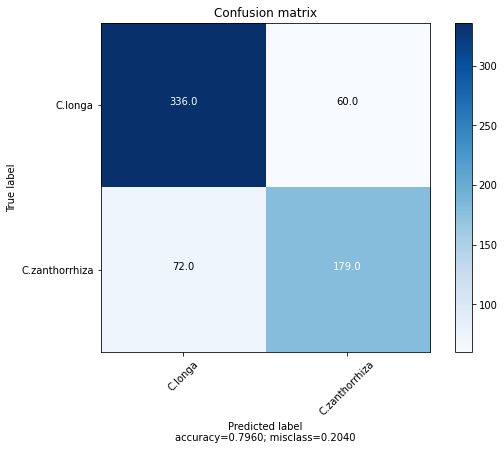



Experiment for k= 3  on all folds

List of Acc. on all folds: [75.3846 80.     78.4615 83.0769 72.3077 76.9231 73.8462 75.     73.4375
 84.375 ]

Max Acc: 84.38 %
Min Acc: 72.31 %
Average : 77.28 %
Standard Deviation: 4.12
Confusion Matrix and its plot:
 [[348.  48.]
 [ 99. 152.]]


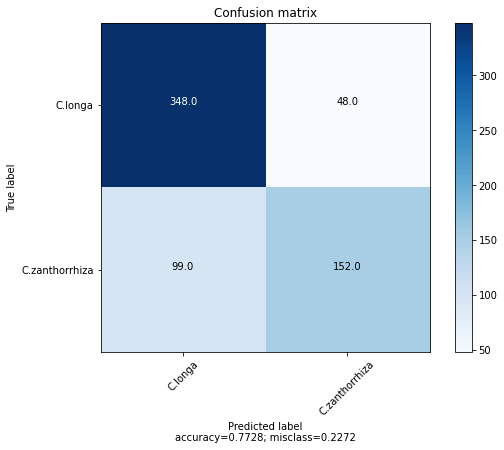



Experiment for k= 5  on all folds

List of Acc. on all folds: [80.     81.5385 80.     84.6154 73.8462 81.5385 72.3077 75.     78.125
 84.375 ]

Max Acc: 84.62 %
Min Acc: 72.31 %
Average : 79.13 %
Standard Deviation: 4.26
Confusion Matrix and its plot:
 [[359.  37.]
 [ 98. 153.]]


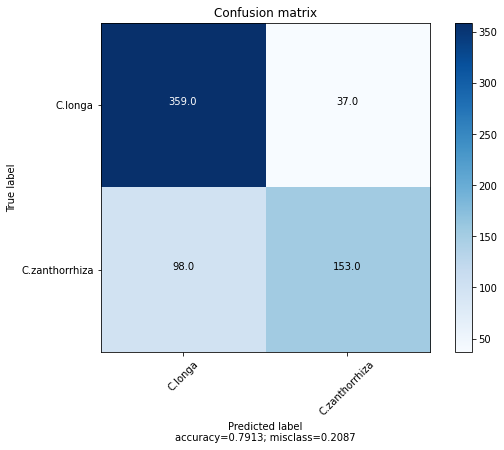



Experiment for k= 7  on all folds

List of Acc. on all folds: [76.9231 83.0769 78.4615 81.5385 73.8462 80.     75.3846 81.25   75.
 82.8125]

Max Acc: 83.08 %
Min Acc: 73.85 %
Average : 78.83 %
Standard Deviation: 3.39
Confusion Matrix and its plot:
 [[368.  28.]
 [109. 142.]]


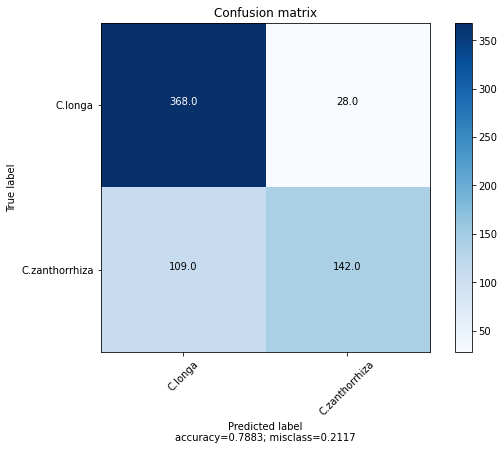



Experiment for k= 9  on all folds

List of Acc. on all folds: [75.3846 80.     76.9231 81.5385 72.3077 75.3846 75.3846 78.125  75.
 78.125 ]

Max Acc: 81.54 %
Min Acc: 72.31 %
Average : 76.82 %
Standard Deviation: 2.7
Confusion Matrix and its plot:
 [[369.  27.]
 [123. 128.]]


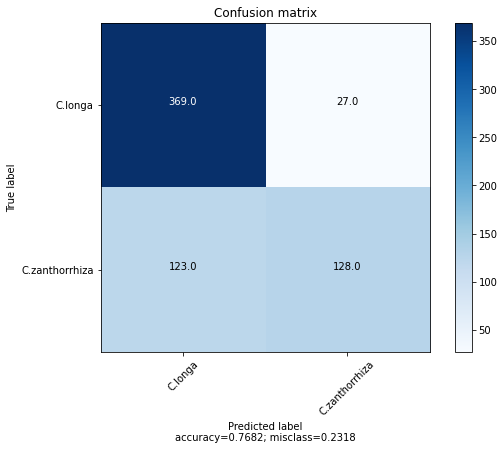



=============== SUMARY K-NN FOR EACH k ON ALL FOLDS ================
[[81.538 76.923 86.154 80.    72.308 81.538 73.846 79.688 76.562 87.5  ]
 [75.385 80.    78.462 83.077 72.308 76.923 73.846 75.    73.438 84.375]
 [80.    81.538 80.    84.615 73.846 81.538 72.308 75.    78.125 84.375]
 [76.923 83.077 78.462 81.538 73.846 80.    75.385 81.25  75.    82.812]
 [75.385 80.    76.923 81.538 72.308 75.385 75.385 78.125 75.    78.125]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

allres = []
for k in [1,3,5,7,9]:
    print('\n\nExperiment for k=',k,' on all folds')
    model = KNeighborsClassifier(n_neighbors=k)
    SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    lst_acc_SF = []
    kumpl_lbl = np.array(kumpl_lbl)
    kumpl_gmbr = np.array(kumpl_gmbr)
    
    num_label=len(kelas_asli)
    all_cm=np.zeros((num_label,num_label))
    for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
        xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
        ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
        model.fit(xlatih_sf, ylatih_sf)
        lst_acc_SF.append(100*model.score(xuji_sf, yuji_sf))

        #for cm only
        from sklearn.metrics import confusion_matrix
        predict = model.predict(xuji_sf)
        cm=confusion_matrix(yuji_sf, predict)
        all_cm=all_cm+cm
      
    print('\nList of Acc. on all folds:', np.around(lst_acc_SF,decimals=4))
    print('\nMax Acc:',
          np.around( max(lst_acc_SF),decimals=2), '%')
    print('Min Acc:',
          np.around(min(lst_acc_SF),decimals=2), '%')
    print('Average :',
          np.around(mean(lst_acc_SF),decimals=2), '%')
    print('Standard Deviation:', 
          np.around(stdev(lst_acc_SF),decimals=2))
    allres.append(lst_acc_SF)
    print('Confusion Matrix and its plot:\n',all_cm)
    plot_confusion_matrix(all_cm,normalize=False)


print('\n\n=============== SUMARY K-NN FOR EACH k ON ALL FOLDS ================')
print(np.around(allres,decimals=3))


**SVM**

In [ ]:
import numpy as np
import cv2
from skimage.color import rgb2gray


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  grey_image = rgb2gray(gmbrz)
  nil_pix = image_to_feature_vector(grey_image)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel='linear')


List of Acc.: [78.4615 75.3846 66.1538 64.6154 66.1538 61.5385 70.7692 75.     78.125
 67.1875]
Max Acc.: 78.46153846153847 %
Min Acc.: 61.53846153846154 %
Average: 70.3389423076923 %
Standard Deviation: 6.0474
Confusion Matrix and its plot:
 [[292. 104.]
 [ 88. 163.]]


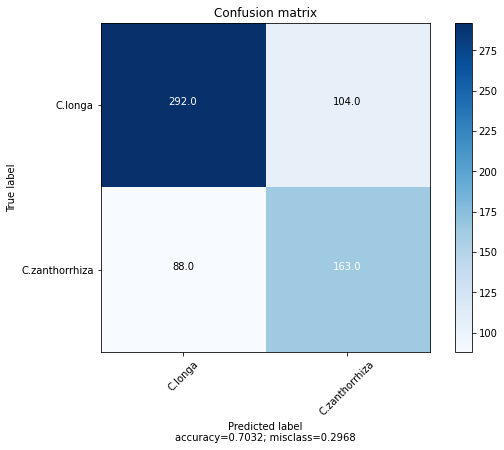

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

num_label=len(kelas_asli)
all_cm=np.zeros((num_label,num_label))

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    svm.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(100*svm.score(xuji_sf, yuji_sf))
    #for cm only
    from sklearn.metrics import confusion_matrix
    predict = svm.predict(xuji_sf)
    cm=confusion_matrix(yuji_sf, predict)
    all_cm=all_cm+cm
print('List of Acc.:', np.around(lst_acc_SF,decimals=4))
print('Max Acc.:',
      max(lst_acc_SF), '%')
print('Min Acc.:',
      min(lst_acc_SF), '%')
print('Average:',
      mean(lst_acc_SF), '%')
print('Standard Deviation:', np.around(stdev(lst_acc_SF),decimals=4))
print('Confusion Matrix and its plot:\n',all_cm)
plot_confusion_matrix(all_cm,normalize=False)
